In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [0]:
def plt_dyn(x, yval, ytrain, ax, colors=['b']):
  ax.plot(x, yval, 'b', label='Validation loss')
  ax.plot(x, ytrain, 'r', label='Training loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [3]:
batch_size = 128
num_cls = 10
epochs = 12

img_rows, img_cols = 28,28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_cls)
y_test = keras.utils.to_categorical(y_test, num_cls)

11493376/11490434 [==============================] - 1s 0us/step


## Model 1

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2651 - acc: 0.9181 - val_loss: 0.0620 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0907 - acc: 0.9733 - val_loss: 0.0462 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0676 - acc: 0.9804 - val_loss: 0.0383 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0311 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0475 - acc: 0.9858 - val_loss: 0.0308 - val_acc: 0.9890
Epoch 6/12
60000/60000 [=

Test score: 0.02388223222637898
Test accuracy: 0.9919


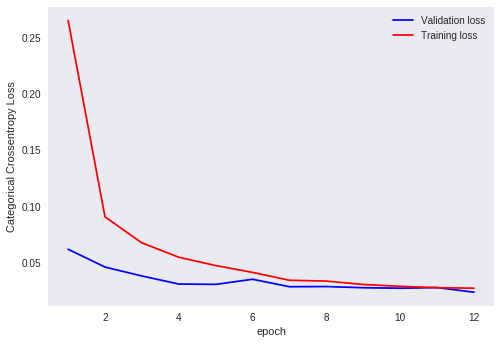

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 1.1

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.3030 - acc: 0.9058 - val_loss: 0.0675 - val_acc: 0.9776
Epoch 2/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1123 - acc: 0.9671 - val_loss: 0.0430 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0856 - acc: 0.9747 - val_loss: 0.0420 - val_acc: 0.9857
Epoch 4/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0735 - acc: 0.9790 - val_loss: 0.0324 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0671 - acc: 0.9801 - val_loss: 0.0331 - val_acc: 0.9891
Epoch 6/12
60000/60000 [=

Test score: 0.028450544688415357
Test accuracy: 0.9904


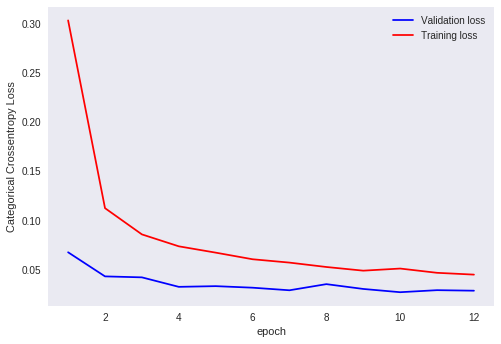

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 1.2

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.2019 - acc: 0.9374 - val_loss: 0.0516 - val_acc: 0.9842
Epoch 2/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0566 - acc: 0.9829 - val_loss: 0.0338 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0375 - acc: 0.9888 - val_loss: 0.0391 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0293 - acc: 0.9905 - val_loss: 0.0322 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0231 - acc: 0.9931 - val_loss: 0.0366 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.0280 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0146 - acc: 0.9952 - val_loss: 0.0288 - 

Test score: 0.033645702404253096
Test accuracy: 0.9916


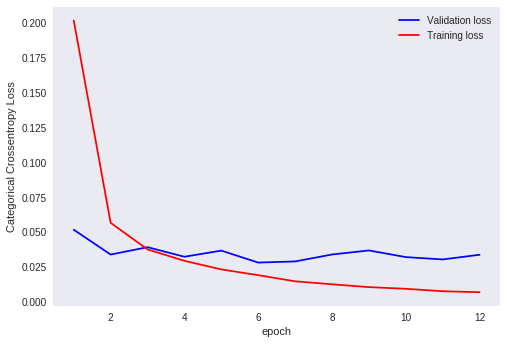

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 2

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 534s 9ms/step - loss: 0.3560 - acc: 0.8895 - val_loss: 0.0528 - val_acc: 0.9835
Epoch 2/12
60000/60000 [==============================] - 533s 9ms/step - loss: 0.1234 - acc: 0.9630 - val_loss: 0.0490 - val_acc: 0.9852
Epoch 3/12
60000/60000 [==============================] - 516s 9ms/step - loss: 0.0994 - acc: 0.9709 - val_loss: 0.0371 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 518s 9ms/step - loss: 0.0857 - acc: 0.9752 - val_loss: 0.0335 - val_acc: 0.9914
Epoch 5/12
60000/60000 [==============================] - 525s 9ms/step - loss: 0.0782 - acc: 0.9777 - val_loss: 0.0300 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 514s 9ms/step - loss: 0.0727 - acc: 0.9789 - val_loss: 0.0270 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 523s 9ms/step - loss: 0.0642 - acc: 0.9816 - val_loss: 0.0345 - 

Test score: 0.026987017115121126
Test accuracy: 0.9919


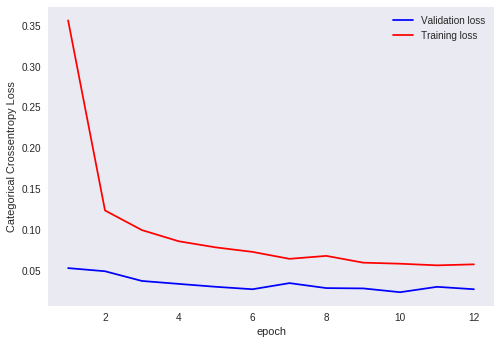

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 3

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(128, kernel_size=(11, 11),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Dropout(0.50))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3505s 58ms/step - loss: 0.8831 - acc: 0.7069 - val_loss: 0.1238 - val_acc: 0.9699
Epoch 2/12
60000/60000 [==============================] - 3545s 59ms/step - loss: 0.2763 - acc: 0.9201 - val_loss: 0.0577 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 3582s 60ms/step - loss: 0.2031 - acc: 0.9442 - val_loss: 0.0467 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 3586s 60ms/step - loss: 0.1714 - acc: 0.9532 - val_loss: 0.0460 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 3587s 60ms/step - loss: 0.1448 - acc: 0.9597 - val_loss: 0.0359 - val_acc: 0.9916
Epoch 6/12
6000

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

Test score: 0.03392359182187356
Test accuracy: 0.9928


## Model 4

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=(11, 11),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(32, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1303s 22ms/step - loss: 2.2456 - acc: 0.1803 - val_loss: 1.9848 - val_acc: 0.1746
Epoch 2/12
60000/60000 [==============================] - 1313s 22ms/step - loss: 1.3956 - acc: 0.4400 - val_loss: 0.7813 - val_acc: 0.6567
Epoch 3/12
60000/60000 [==============================] - 1300s 22ms/step - loss: 1.0280 - acc: 0.5800 - val_loss: 0.6283 - val_acc: 0.7354
Epoch 4/12
60000/60000 [==============================] - 1311s 22ms/step - loss: 0.8757 - acc: 0.6474 - val_loss: 0.5260 - val_acc: 0.7438
Epoch 5/12
60000/60000 [==============================] - 1314s 22ms/step - loss: 0.7602 - acc: 0.6993 - val_loss: 0.3511 - val_acc: 0.8686
Epoch 6/12
6000

Test score: 0.19232530520558358
Test accuracy: 0.8916


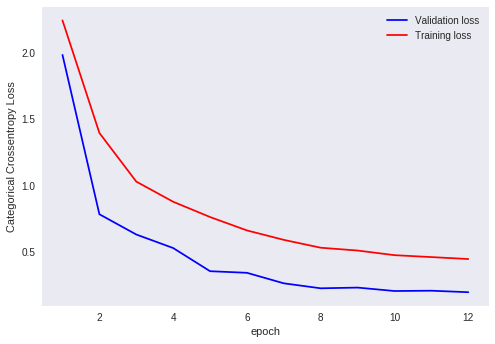

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Procedure

 - I started by building shallow CNN models. 
 - I plotted the entropy loss vs epochs to keep track of the progress.
 - Next I varied the drop out rates, keeping everything else the same, to see how it impacted the performance.
 - I increased the number of layers and complexity with each successive model, with the last model being the deepest one.

# CONCLUSION

| Model | Test Accuracy |
| --- | --- |
| Model 1 | 0.9919 |
| Model 1.1(increased drop-out rates) | 0.9904 |
| Model 1.2(reduced drop-out rates) | 0.9916 |
| Model 2 | 0.9919 |
| Model 3 | 0.9928 |
| Model 4 | 0.8916 |


 - Best accuracy was acheived in Model 3
 - We can also conclude that adding more layers in the CNN network does not necessarily guarantee better performance.
 - After significantly increasing the drop outrate from Model 1 to Model 1.1, the performance slightly dropped.
 - And by significantly reducing the drop out rate in Model 1.2, the performance remained more or less the same.
 - There is a significant drop in performance from Model 3 to Model 4. Perhaps this is due to increased number of additional layers which probably negatively impacted the model performance.